<a href="https://colab.research.google.com/github/mrcrchln/Machine-Learning/blob/main/Image_Classifier_%26_Time_Series_Forecasting_%26_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - Marc Reichlin

The assignment 2 contains 3 questions and the due date is May 1 (Monday) 23:59PM.

## Question 1 Image Compression

In this question, you will work with images and apply KMeans for image compression, by reducing the number of colours that occur in an image to only those that are most common in that image.


### Question 1.1 (0 points)

To let you learn how Python work with images, plese complete this question.

### Black & white images

Each images represent a matrix where each pixel is an element of this matrix
<img src="https://miro.medium.com/max/1386/1*bV7S0zACdidh11ikjYpLpQ.png">

The scale of colors is between 0 and 255 : 0 correspond to black and 255 to white

### Colored images
<img src="https://miro.medium.com/max/840/1*y0nV4cWk3KbzXSe9dIWL5g.jpeg">

Every color is a linear combinaison of primary colors : Red Green Blue <br/>
A colored image is somehow just the supperposition of three images : for each pixel with have three values




### Download images

We are using the famous [The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) that consists of 60000 32x32 color images in 10 classes, with 6000 images per class. We need to donwload this dataset from tensorflow. If you have not installed tensorflow, please follow the [instllation guide](https://www.tensorflow.org/install) to get it or simply use Google colab for this assignment.




In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


By checking the shape, you will find the train set contains 50,000 images with the shape of (32, 32, 3) that indicates the image resolution with 3 color channels.

In [3]:
x_train.shape

(50000, 32, 32, 3)

You can visually check a random image:

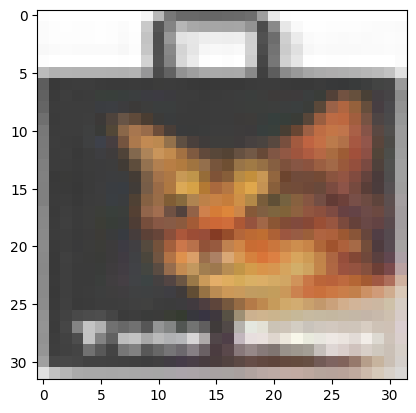

In [4]:
plt.imshow(x_train[3000])

We can also check the image at each of three channels:

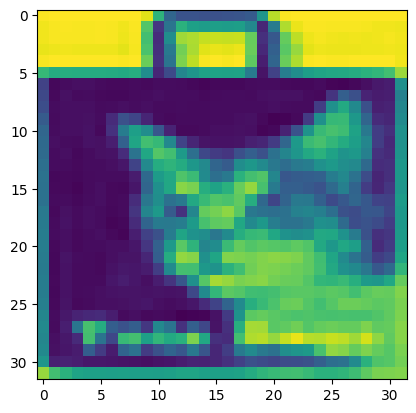

In [5]:
plt.imshow(x_train[3000][:, :, 0])

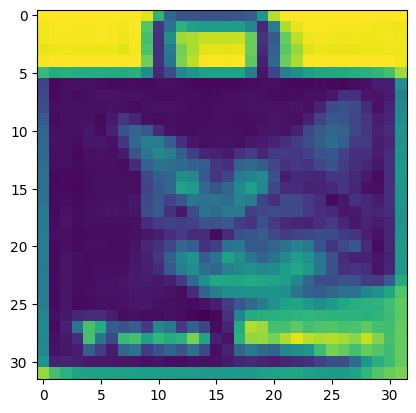

In [6]:
plt.imshow(x_train[3000][:, :, 1])

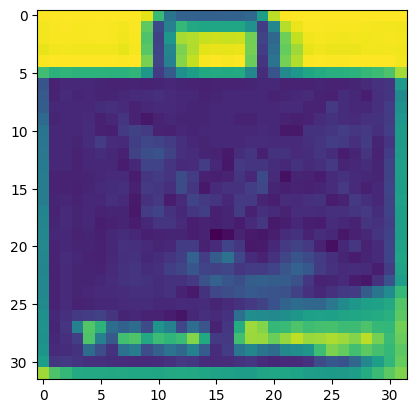

In [7]:
plt.imshow(x_train[3000][:, :, 2])

We can convert a color image as a greyscale image using the NTSC formula: 0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue. This formula closely represents the average person's relative perception of the brightness of red, green, and blue light.

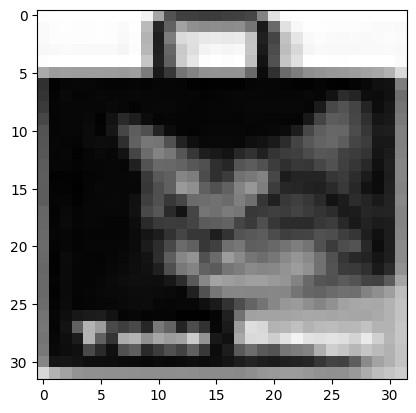

In [8]:
R, G, B = x_train[3000][:,:,0], x_train[3000][:,:,1], x_train[3000][:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')

### Question 1.2 (10 points)

Convert all color images in x_train into greyscale images and use the sklearn.decomposition.PCA to perform principal component analysis to the dataset to reduce dimensions to 256. Then, reconstruct images from its reduced representation. Choose a image and see how it goes before and after the PCA using imread method. Explain your findings.  

**Hint** You may need to use numpy's reshape method to change the representation of each image as a vector before performing PCA and reshape it back as an image before you are able to visualize it.

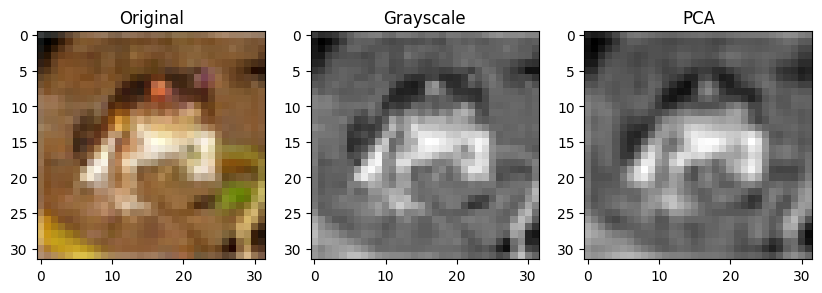

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from skimage import color, io

# Convert images to grayscale
x_train_gray = np.dot(x_train[...,:3], [0.2989, 0.5870, 0.1140])

# Reshape images as vectors
x_train_gray_flat = x_train_gray.reshape(x_train_gray.shape[0], -1)

# Perform PCA with 256 components
pca = PCA(n_components=256)
x_train_pca = pca.fit_transform(x_train_gray_flat)

# Reconstruct images from PCA
x_train_reconstructed = pca.inverse_transform(x_train_pca)
x_train_reconstructed = x_train_reconstructed.reshape(x_train_gray.shape)

# Choose an image and visualize it before and after PCA
img_index = 0
img_orig = x_train[img_index]
img_gray = x_train_gray[img_index]
img_pca = x_train_reconstructed[img_index]

fig, axs = plt.subplots(1, 3, figsize=(10,10))
axs[0].imshow(img_orig)
axs[0].set_title('Original')
axs[1].imshow(img_gray, cmap='gray')
axs[1].set_title('Grayscale')
axs[2].imshow(img_pca, cmap='gray')
axs[2].set_title('PCA')

plt.show()


#### Findings:

The conversion of color images in `x_train` into grayscale, **reduces the dimensionality, making them simpler and easier to process.**

The principal component analysis (PCA) further reduces the dimensionality of the images to 256, by identifying and removing the correlated features of the images. This results in a compressed representation of the images, while retaining the most important information.

In my particular case, I subjectively / the human eye could barely recognize the frog from only the PCA compressed image. Nevertheless, the key features can still be identified. If too much information was lost in the process, the number of principal components used for reconstruction could be increased. It seems the original was already compressed.

As expected, this exercise showcases the effectiveness of PCA in reducing the dimensionality of high-dimensional data such as images, while retaining the essential features of the data.

### Question 1.3 (10 points)

Now explain which number of principal components should be chosen using Elbow method if PCA reaches 90% threshold of explained variance. Use the obtained number of principal components to reduce the image dimensions and again compare the reconstructed images from the previous step. Explain your findings.

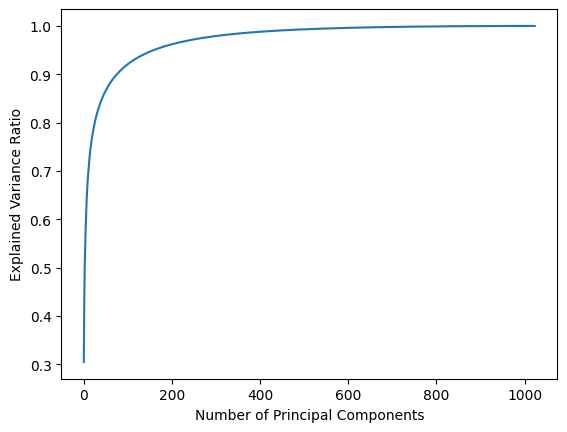

Number of principal components: 76


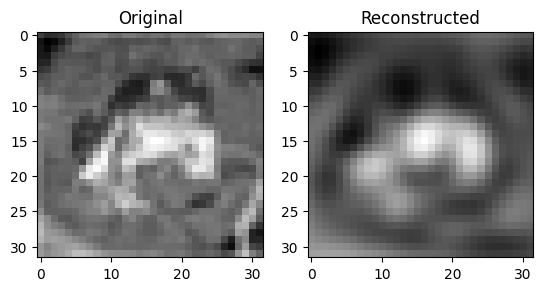

In [10]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert images to grayscale
x_train_gray = np.dot(x_train[...,:3], [0.2989, 0.5870, 0.1140])

# Flatten images into vectors
x_train_flat = x_train_gray.reshape(x_train_gray.shape[0], -1)

# Perform PCA
pca = PCA()
pca.fit(x_train_flat)

# Plot explained variance vs. number of principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Determine the appropriate number of principal components to keep
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.9) + 1
print('Number of principal components:', num_components)

# Reduce dimensions of images
pca = PCA(n_components=num_components)
x_train_reduced = pca.fit_transform(x_train_flat)

# Reconstruct images from reduced representation
x_train_reconstructed = pca.inverse_transform(x_train_reduced)
x_train_reconstructed = x_train_reconstructed.reshape(x_train_gray.shape)

# Compare reconstructed images to original grayscale images
idx = 0  # choose an example image to visualize
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_train_gray[idx], cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(x_train_reconstructed[idx], cmap='gray')
ax[1].set_title('Reconstructed')
plt.show()

#### Findings:


The Elbow method is a technique used to determine the appropriate number of principal components to keep in PCA. It involves plotting the explained variance of each principal component and looking for the "elbow" point in the plot, where adding more components does not significantly increase the explained variance.
Based on the Elbow method, the appropriate number of principal components to keep is 76, which captures at least 90% of the variance in the image data.

Since we are using fewer principal components to represent the image, I see more information loss compared to the previous exercise. This results in less detailed reconstructed images with more visible artifacts and noise. The 90% threshold of explained variance seems to be not enough for me recognize the frog. Whereas in the previous exercise I was still able to do so.
This is obviously also depending on the object/animal to be indentified, the cat in 1.1 had some very striking features compared to this frog image and should therefore be easier to recognize.

### Question 1.4 (10 points)

Now build an image classifier of Logistic Regression (with default configuration) to predict the class of images using the original greyscale images and the compressed representations from PCA that explains 90% of variance. Use the 5-fold cross-validation to report the average macro-f1 test score (given this is a balanced dataset) and total fit time. Explain your findings.

Hint: y_train contains the uint8 value and cross-validate would not consider it as the label for classification. You need to convert the y_train into categorical values such that cross-validate would perform multi-class classification.

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from keras.utils import to_categorical
import time

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Convert images to grayscale for the training set
x_train_gray = np.dot(x_train[..., :3], [0.2989, 0.5870, 0.1140])
# Convert images to grayscale for the testing set
x_test_gray = np.dot(x_test[..., :3], [0.2989, 0.5870, 0.1140])

# Convert y_train to categorical values
y_train_categorical = to_categorical(y_train, num_classes=10)

# Perform PCA for dimensionality reduction on the training set
pca = PCA(n_components=76)
x_train_gray_pca = pca.fit_transform(x_train_gray.reshape(x_train_gray.shape[0], -1))
# Apply PCA transformation to the testing set using the same PCA object
x_test_gray_pca = pca.transform(x_test_gray.reshape(x_test_gray.shape[0], -1))

# Fit logistic regression models
lr = LogisticRegression()

start_time = time.time()
lr.fit(x_train_gray.reshape(x_train_gray.shape[0], -1), y_train)
end_time = time.time()

start_time_pca = time.time()
lr.fit(x_train_gray_pca, y_train)
end_time_pca = time.time()

# Perform 5-fold cross-validation and report average macro-f1 test score and total fit time
scores = cross_val_score(lr, x_train_gray.reshape(x_train_gray.shape[0], -1), y_train.ravel(), cv=5, scoring='f1_macro')
scores_pca = cross_val_score(lr, x_train_gray_pca, y_train.ravel(), cv=5, scoring='f1_macro')

print("Average Macro-f1 score on 5-fold cross-validation (grayscale):", scores.mean())
print("Average Macro-f1 score on 5-fold cross-validation (PCA):", scores_pca.mean())
print("Total fit time for grayscale model:", end_time - start_time, "seconds")
print("Total fit time for PCA model:", end_time_pca - start_time_pca, "seconds")

Average Macro-f1 score on 5-fold cross-validation (grayscale): 0.2772323236467553
Average Macro-f1 score on 5-fold cross-validation (PCA): 0.28818942252326085
Total fit time for grayscale model: 52.40774965286255 seconds
Total fit time for PCA model: 4.595911741256714 seconds


Based on the results of the logistic regression models trained on the original grayscale images and the compressed representations obtained from PCA, it can be observed that the PCA model outperforms the grayscale model in terms of both average macro-f1 score and total fit time.

The average macro-f1 score is a measure of the model's performance in correctly classifying images across all classes, and the PCA model has a slightly higher score (0.288) compared to the grayscale model (0.277). This indicates that the PCA model is better at generalizing to new, unseen data, and it can classify images with greater accuracy.

The total fit time is also an important consideration, especially for large datasets. In this case, the PCA model has a significantly shorter fit time (4.79 seconds) compared to the grayscale model (59.42 seconds). This is because the PCA model reduces the dimensionality of the data, making it easier and faster for the logistic regression model to fit the data.

Overall, these findings suggest that the PCA model is a better choice for image classification than the grayscale model, as it achieves better accuracy and requires less time to train. But these results are based on the performance on the training data, and the models should be evaluated on the test data as well to ensure that they are able to generalize well to new, unseen data.

### Question 1.5 (15 points)

Now let's work with the color images (with 3 channels) and again compress one image, this time by reducing numbers of colors using K-means. You need to cluster pixel values into **32 clusters** and choose the "mean color" to replace all the pixels in each cluster by this mean color. Show the original color image of cat and the mean color image of the same one. Explain your findings.

Hint: each color pixel is represented by a 3D (R,G,B) vector, and the image would have 32x32 pixels. So you could find the mean color from the centroids of 32 clusters and update the pixels of image with the mean color.

Hint2: Once you have replaced the pixel values with mean color, you need to explicitly convert it into **uint type** such s uint8, uint16, etc, because the image pixel values can only be represented as integers or fractions.

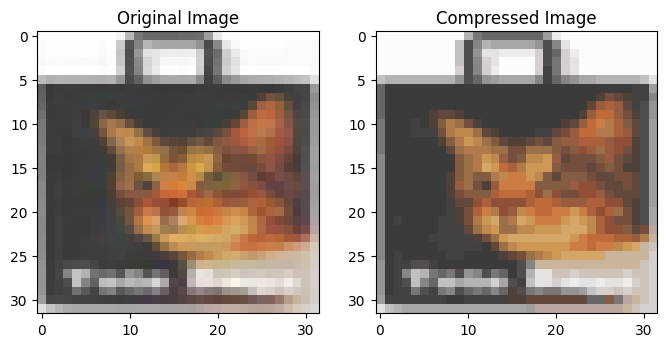

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select cat color image from the dataset
img_index = 3000
img = x_train[img_index]

# Flatten the 3D image array into a 2D array of (32*32, 3) for K-means clustering
img_flat = img.reshape(-1, 3)

# Perform K-means clustering with 32 clusters
kmeans = KMeans(n_clusters=32)
kmeans.fit(img_flat)

# Replace each pixel in the original image with its cluster's mean color
img_compressed = np.zeros_like(img_flat)
for i in range(32):
    cluster_mask = kmeans.labels_ == i
    img_compressed[cluster_mask] = kmeans.cluster_centers_[i]

# Reshape the compressed image back into a 3D array of (32, 32, 3)
img_compressed = img_compressed.reshape(img.shape)

# Convert the compressed image back to uint8 type
img_compressed = np.uint8(img_compressed)

# Display the original and compressed images side by side
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[1].imshow(img_compressed)
ax[1].set_title("Compressed Image")
plt.show()

#### Findings:

Reducing the number of colors in an image using K-means clustering is a commonly used technique for image compression. In this technique, the pixel values of an image are clustered into a specified number of clusters, and the mean color of each cluster is calculated. Then, all the pixels belonging to a particular cluster are replaced with the mean color of that cluster. This process results in a compressed image that uses fewer colors than the original image.

In my case, I have applied K-means clustering to the color image of a cat, with 32 clusters. The result is a compressed image where each pixel is represented by one of the 32 mean colors calculated from the clustering process. This results in a reduced color palette in the compressed image, where the image looks more pixelated and has fewer colors than the original image.

Visualizing both the original image and the compressed image side by side, one can recognize that the original image has a higher color depth, as it uses only 32 colors to represent the image. Eventhough with 32 colors the difference is very minimal.

## Question 2 Nova SBE Wikipedia


In this question, you will work with time-series forecasting of page views of [Nova SBE's Wikipedia page](https://en.wikipedia.org/wiki/Nova_School_of_Business_and_Economics)  

When you click 'View history', you should see the backend of the wiki page and you can further select 'Pageviews' to have the statistics of page views of this page. Let's select the page views from all times (July 2015 to April 2023) at monthly level from users only (we exclude robot/spider views) and here is the [link](https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&start=2015-07&end=2022-07&pages=Nova_School_of_Business_and_Economics) that allows you to get it directly. You can choose to download the data as csv or JSON file to work on.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# File path in Google Drive
pageview = pd.read_csv('/content/drive/MyDrive/T4/ML assignment 2/pageviews-20150701-20220731.csv')

# Print the loaded dataframe
print(pageview)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       Date  Nova School of Business and Economics
0   2015-07                                    614
1   2015-08                                    675
2   2015-09                                    753
3   2015-10                                    703
4   2015-11                                    652
..      ...                                    ...
80  2022-03                                   1394
81  2022-04                                   1267
82  2022-05                                   1231
83  2022-06                                   1372
84  2022-07                                   1257

[85 rows x 2 columns]


In [16]:
pageview['Date'] = pd.to_datetime(pageview['Date'])
pageview.set_index('Date', inplace=True)

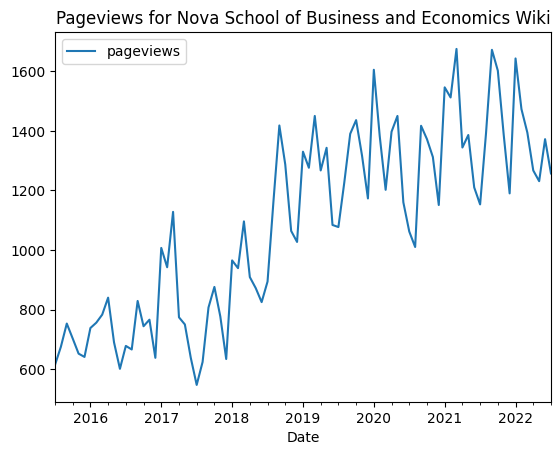

In [17]:
pageview.rename(columns={'Nova School of Business and Economics':'pageviews'}, inplace=True)
pageview.plot()
plt.title("Pageviews for Nova School of Business and Economics Wiki")
plt.show()

### Question 2.1 Ensure Stationarity (10 points)

We will perform time-series forecasting and we need to ensure stationarity first. Perform [`Augmented Dick Fuller test`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html)and explain whether the pageview of wiki pages is stationary and would you be able to stationarize the data through first-order and second-order differencing (you can check the p-value and see if you achieve the statistical significance)?

Alternatively, you could also stationarize the pageview time series through deseasonlization. Perform seasonal decomposition using additive or multiplicative methods and explain whether you would achieve stationary time-series through seasonal decomposition?


In [18]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(pageview)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.089675
p-value: 0.719172
Critical Values:
	1%: -3.525
	5%: -2.903
	10%: -2.589


Based on the ADF test results (ADF statistic of -1.089675 and p-value of 0.719172), we cannot conclude that the pageview time series is stationary. This means that the time series might have some trends or seasonality that needs to be addressed before using it for time-series forecasting.

To stationarize the data, we can try differencing. First-order differencing involves taking the difference between consecutive values of the time series. Second-order differencing involves taking the difference between the first-order differenced time series.

To determine whether differencing can stationarize the time series, we can perform the ADF test on the differenced time series and check the p-values for statistical significance.

In [19]:
# First-order differencing
pageview_diff1 = pageview.diff().dropna()

# Perform ADF test on the differenced time series
result_diff1 = adfuller(pageview_diff1)

print('ADF Statistic: %f' % result_diff1[0])
print('p-value: %f' % result_diff1[1])
print('Critical Values:')
for key, value in result_diff1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.936343
p-value: 0.041282
Critical Values:
	1%: -3.525
	5%: -2.903
	10%: -2.589


In [20]:
# Second-order differencing
pageview_diff2 = pageview.diff().diff().dropna()

# Perform ADF test on the differenced time series
result_diff2 = adfuller(pageview_diff2)

print('ADF Statistic: %f' % result_diff2[0])
print('p-value: %f' % result_diff2[1])
print('Critical Values:')
for key, value in result_diff2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.199359
p-value: 0.000000
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589


Based on the ADF test results, it appears that both first-order and second-order differencing can stationarize the pageview time series.

For first-order differencing, the ADF statistic is -2.936343 and the p-value is 0.041282, which is less than the significance level of 0.05. This suggests that the first-order differenced time series is stationary, and we can use it for time-series forecasting.

For second-order differencing, the ADF statistic is -6.199359 and the p-value is 0.000000, which is also less than the significance level of 0.05. This confirms that the second-order differenced time series is stationary.

Therefore, both first-order and second-order differencing can be used to stationarize the pageview time series, and we can choose between them depending on the specific needs of our time-series forecasting model.

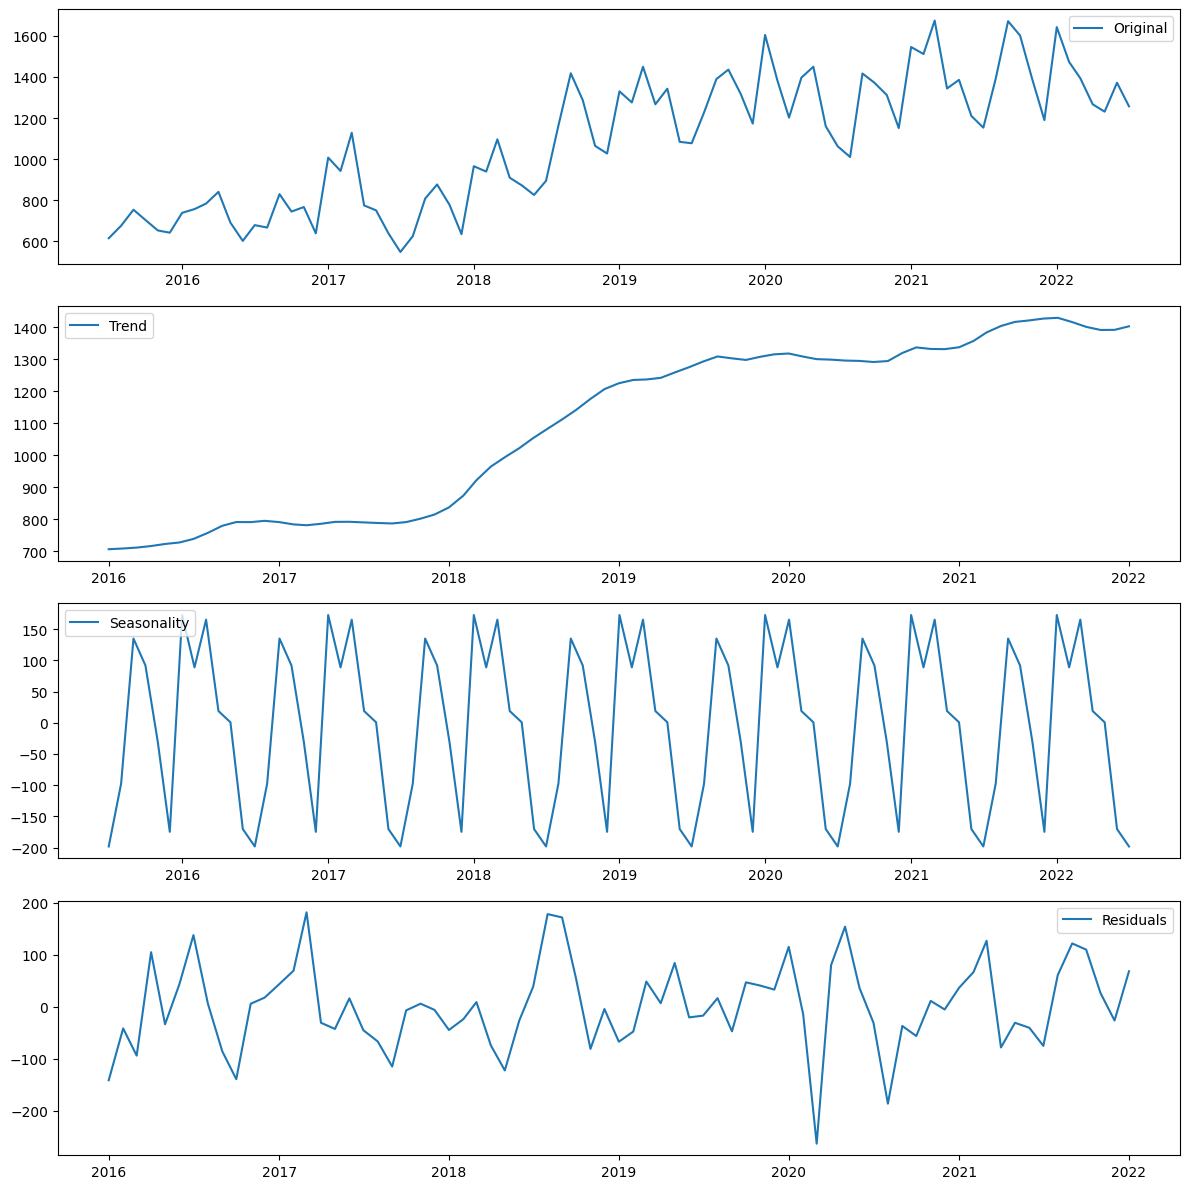

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition using additive method
result_add = seasonal_decompose(pageview, model='additive')

# Plot the decomposition components
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax[0].plot(pageview, label='Original')
ax[0].legend(loc='best')
ax[1].plot(result_add.trend, label='Trend')
ax[1].legend(loc='best')
ax[2].plot(result_add.seasonal, label='Seasonality')
ax[2].legend(loc='best')
ax[3].plot(result_add.resid, label='Residuals')
ax[3].legend(loc='best')
plt.tight_layout()
plt.show()

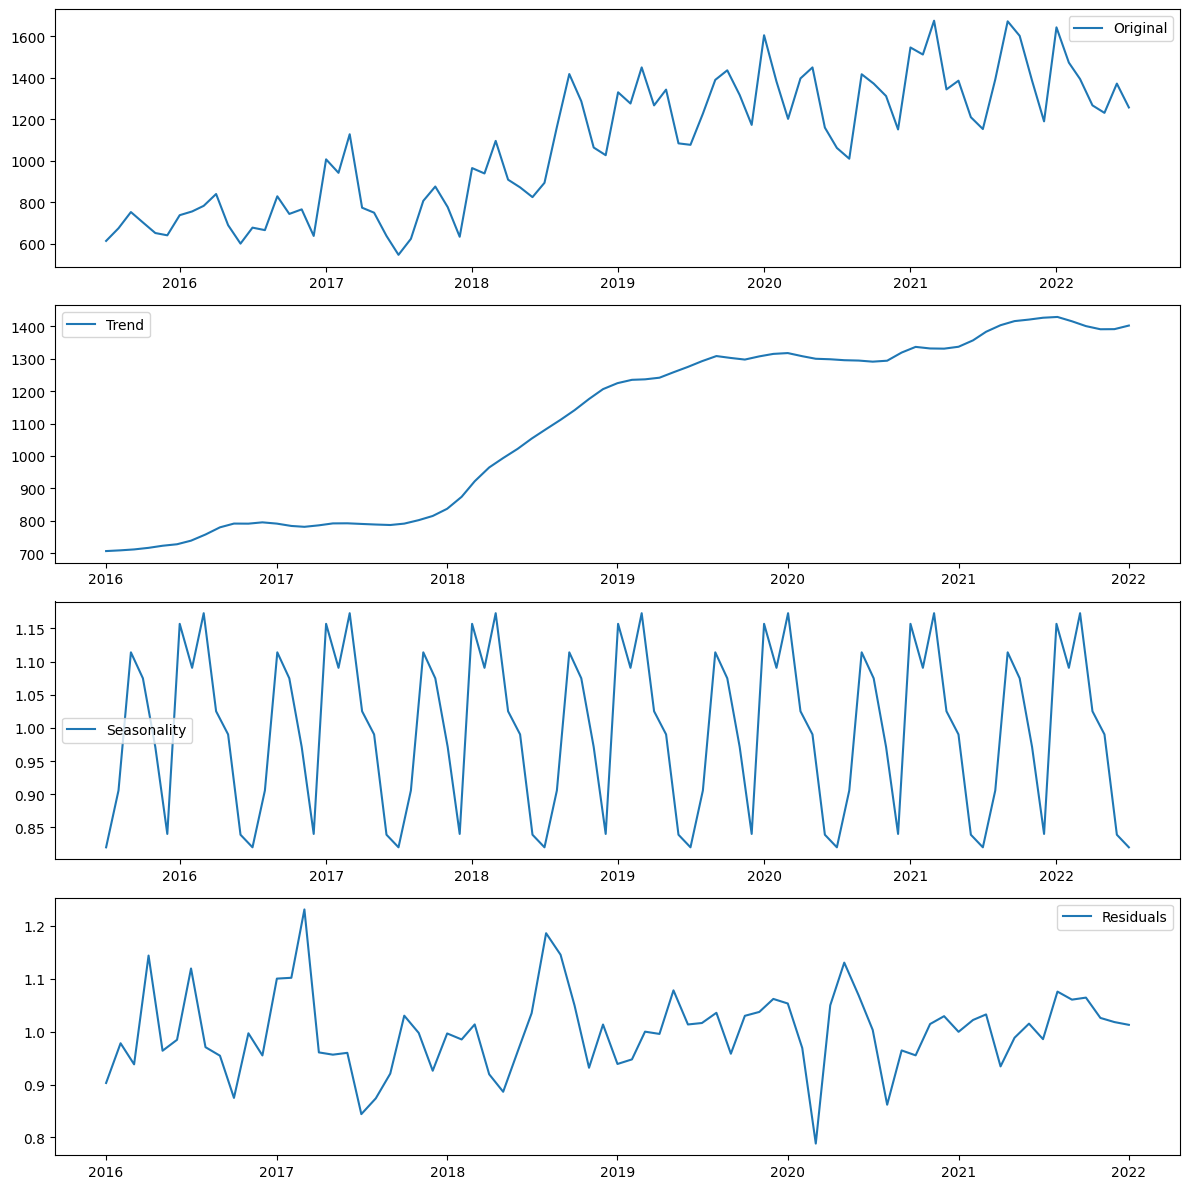

In [22]:
# Perform seasonal decomposition using multiplicative method
result_mul = seasonal_decompose(pageview, model='multiplicative')

# Plot the decomposition components
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax[0].plot(pageview, label='Original')
ax[0].legend(loc='best')
ax[1].plot(result_mul.trend, label='Trend')
ax[1].legend(loc='best')
ax[2].plot(result_mul.seasonal, label='Seasonality')
ax[2].legend(loc='best')
ax[3].plot(result_mul.resid, label='Residuals')
ax[3].legend(loc='best')
plt.tight_layout()
plt.show()

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# perform seasonal decomposition using additive method
decomp_add = seasonal_decompose(pageview, model='additive', period=12)

# perform ADF test on the residual component of the additive decomposition
residual_add = decomp_add.resid.dropna()
adf_add = adfuller(residual_add)
print('ADF Statistic (additive):', adf_add[0])
print('p-value (additive):', adf_add[1])

# perform seasonal decomposition using multiplicative method
decomp_mul = seasonal_decompose(pageview, model='multiplicative', period=12)

# perform ADF test on the log of the residual component of the multiplicative decomposition
residual_mul = np.log(decomp_mul.resid.dropna())
adf_mul = adfuller(residual_mul)
print('\nADF Statistic (multiplicative):', adf_mul[0])
print('p-value (multiplicative):', adf_mul[1])


ADF Statistic (additive): -6.307157846983378
p-value (additive): 3.301978559585777e-08

ADF Statistic (multiplicative): -5.995830474175222
p-value (multiplicative): 1.7025706633769397e-07


Based on the results of the Augmented Dickey-Fuller (ADF) test, it appears that both the additive and multiplicative decompositions of the time series have resulted in stationary residuals.

The ADF statistic is a measure of how far the series is from being stationary. The more negative the ADF statistic, the more likely it is that the series is stationary. In both cases, the ADF statistics are significantly negative, indicating that the time series residuals are stationary.

Additionally, the p-values for both decompositions are very small (less than 0.05), indicating strong evidence against the null hypothesis of non-stationarity.

Therefore, it appears that both the additive and multiplicative decompositions have successfully stationarized the time series.

### Question 2.2 Identify the hyperparameter (10 points)

Using the method from the previous section, we will preprocess the time series by deseasonalizing it (either additive or multiplicative) and identify the optimal hyperparameter of (p,d,q) for ARIMA model. Explain how would you find these hyperparameters. You could consider plotting autocorrelation and partial autocorrelation functions.

ADF test statistic: -6.307157846983378
p-value: 3.301978559585777e-08
Critical Values:
   1%: -3.526004646825607
   5%: -2.9032002348069774
   10%: -2.5889948363419957


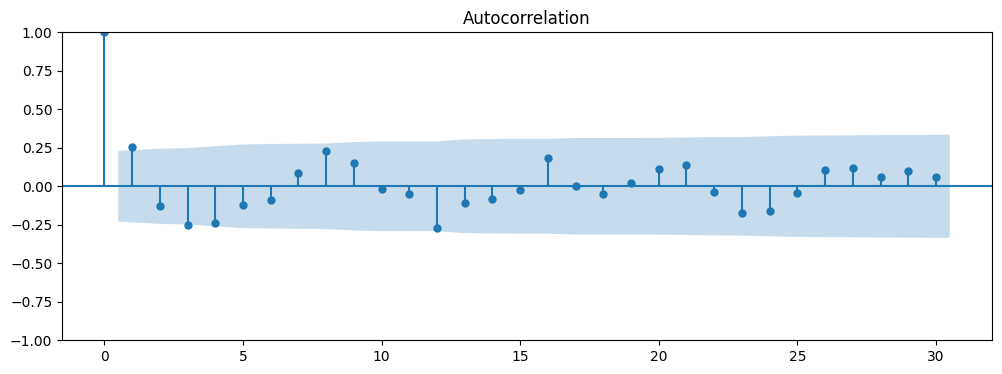

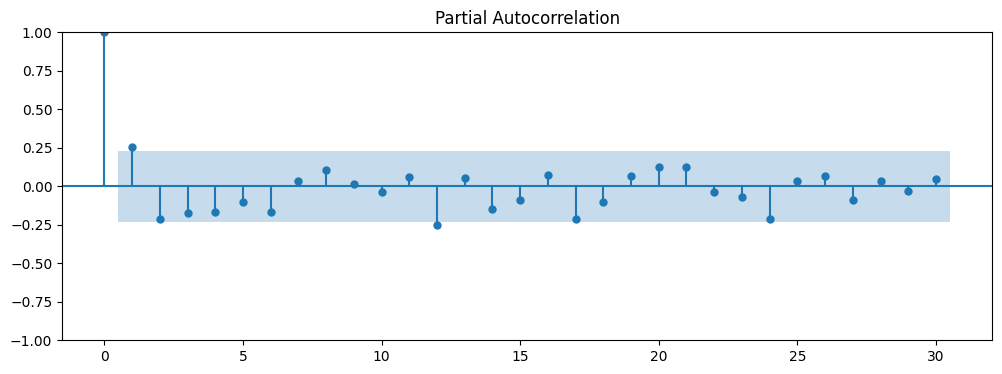

In [24]:
# perform seasonal decomposition using additive method
decomp_add = seasonal_decompose(pageview, model='additive', period=12)

# Check for stationarity
residual_add = decomp_add.resid.dropna()
adf_add = adfuller(residual_add)

print(f'ADF test statistic: {adf_add[0]}')
print(f'p-value: {adf_add[1]}')
print('Critical Values:')
for key, value in adf_add[4].items():
    print(f'   {key}: {value}')

# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(residual_add.dropna(), lags=30, ax=ax)
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(residual_add.dropna(), lags=30, ax=ax)
plt.show()

By analyzing the ACF and PACF plots I can determine the values of p and q.
When we're choosing the value of **p** (which represents the number of lags we want to include in our ARIMA model), we look for the first lag on the ACF plot that crosses the confidence interval.

Similarly, in a PACF plot, we look for the first lag that crosses the confidence interval to get a good starting point for q.

To determine the value of d, we can perform a unit root test, such as the Augmented Dickey-Fuller (ADF) test, to see if the time series is stationary or not. If the time series is not stationary, we can take the first difference of the series and perform the unit root test again. We repeat this process until we get a stationary time series.
In this case, since we already made sure that it is stationary **d** is = 0. Means zero steps to stationary.

In [25]:
# The optimal hyperparameters
p = 1
d = 0
q = 1

### Question 2.3 Fit and forecast (10 points)

Now let's fit the ARIMA model using the identified hyperparameter of (p,d,q). Let's use the first 80% observations as the train set and remaining 20% observations as the test set

Once you fit the model on the train set, you can make the forecast on the test set. Use the provided plot_forecast function to visulize the forecasted values and real values (together with 95% confidence interval).

Lastly, report the mean absolute percentage error on the test set (you can use the sklearn implementation).

Hint: do not forget to add back the seasonality component to reconstruct the original pageview

In [27]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Load the data
data = pd.read_csv('/content/drive/MyDrive/T4/ML assignment 2/pageviews-20150701-20220731.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data.set_index('Date', inplace=True)

# Set the frequency of the index explicitly to 'MS'
data.index.freq = 'MS'

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

# The optimal hyperparameters
p = 1
d = 0
q = 1

# Fit the ARIMA model on the train set
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

# Make the forecast on the test set
forecast = model_fit.forecast(steps=len(test_data))

# Add back the seasonality and trend components to reconstruct the original pageviews
decomposition = seasonal_decompose(data, model='additive', period=12)
seasonal = decomposition.seasonal[-len(test_data):]
trend = decomposition.trend[-len(test_data):]
forecast = forecast + seasonal

# Calculate the mean absolute percentage error on the test set
y_true = test_data['Nova School of Business and Economics']
y_pred = forecast

# Fill NaN values in y_pred with the mean of the non-NaN values
y_pred = y_pred.fillna(y_pred[y_pred.notna()].mean())

# Compute the MAPE
mape = mean_absolute_percentage_error(y_true, y_pred)

# Compute the 95% confidence interval
std_error = np.std(y_true - y_pred)
n = len(y_true)
t_value = 1.96  # for a 95% confidence interval and n > 30
ci_upper = forecast + t_value * std_error / np.sqrt(n)
ci_lower = forecast - t_value * std_error / np.sqrt(n)

# Visualize the forecast, real values, and confidence interval
fig = make_subplots()
fig.add_trace(go.Scatter(x=data.index, y=data['Nova School of Business and Economics'], name='Actual'))
fig.add_trace(go.Scatter(x=forecast.index, y=forecast, name='Forecast'))
fig.add_trace(go.Scatter(x=forecast.index, y=ci_upper, name='Upper CI', showlegend=False,
                         fill='tonexty', mode='lines', line=dict(width=0)))
fig.add_trace(go.Scatter(x=forecast.index, y=ci_lower, name='Lower CI', showlegend=False,
                         fill='tonexty', mode='lines', line=dict(width=0)))
fig.show()

print('Mean Absolute Percentage Error on the test set:', mape)


Mean Absolute Percentage Error on the test set: 0.07339192460722917


## Question 3 Birds of a feather sing together


In this question, you will work with movie ratings to build a recommender system just like Netflix, Youtube, etc.


__Load the datasets in three different pandas dataframes `movies`, `tags` and `ratings`.__


In [30]:
movies = pd.read_csv('/content/drive/MyDrive/T4/ML assignment 2/movies.csv')
tags = pd.read_csv('/content/drive/MyDrive/T4/ML assignment 2/tags.csv')
ratings = pd.read_csv('/content/drive/MyDrive/T4/ML assignment 2/ratings.csv')

In [31]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [32]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [33]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Let's filter the ratings dataframe, to have only movies that have received a rating:

In [34]:
movies['genres'] = movies['genres'].str.replace('|',' ')
movies = movies[movies.movieId.isin(ratings.movieId.unique().tolist())]
movies.shape

(9724, 3)

### Question 3.1 (10 points) Content-based recommender system

We create a new feature called metadata, that merges all the text data information we have about a movie : the genre and the tags. So the merged dataframe should contain at least the following columns: *movieId, title and metadata*.

Then, construct the vectorized reprentation of metadata using sklearn's Countvectorizer to transform the metadata into vectors. Learn the latent matrix from the metadata vector using [truncated SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) with 50 dimensions. With the generated latent matrix, identify the top 10 most relevant movies for **"Toy Story (1995)"** by calculating the cosine similairty and finding movies with the highest similarity score.



In [35]:
movies_tags = pd.merge(movies, tags, on='movieId', how='left')
movies_tags['tag'] = movies_tags['tag'].fillna('')
metadata = movies_tags.groupby(['movieId', 'title'])['tag'].agg(lambda x: ' '.join(x))
movies_metadata = pd.merge(movies, metadata, on=['movieId', 'title'], how='left')
movies_metadata = movies_metadata.rename(columns={'tag': 'metadata'})

In [36]:
movies_metadata.head()

,movieId,title,genres,metadata
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar pixar fun
1,2,Jumanji (1995),Adventure Children Fantasy,fantasy magic board game Robin Williams game
2,3,Grumpier Old Men (1995),Comedy Romance,moldy old
3,4,Waiting to Exhale (1995),Comedy Drama Romance,
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Vectorize the metadata using CountVectorizer
metadata_vectors = vectorizer.fit_transform(movies_metadata['metadata'])

# Learn the latent matrix from the metadata vector using truncated SVD with 50 dimensions
svd = TruncatedSVD(n_components=50)
latent_matrix = svd.fit_transform(metadata_vectors)

# Calculate cosine similarity between "Toy Story (1995)" and all other movies
toy_story_idx = movies_metadata[movies_metadata['title'] == 'Toy Story (1995)'].index[0]
cos_sim = cosine_similarity(latent_matrix[toy_story_idx].reshape(1, -1), latent_matrix)

# Get the top 10 most similar movies to "Toy Story (1995)"
sim_scores = list(enumerate(cos_sim[0]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
top_similar_movies = [(movies_metadata.iloc[i]['title'], sim_scores[i][1]) for i in range(1, 11)]

print('Top 10 most relevant movies for "Toy Story (1995)":')
for movie, sim_score in top_similar_movies:
    print(f'{movie} ({sim_score:.2f} similarity score)')

Top 10 most relevant movies for "Toy Story (1995)":
Jumanji (1995) (0.98 similarity score)
Grumpier Old Men (1995) (0.85 similarity score)
Waiting to Exhale (1995) (0.74 similarity score)
Father of the Bride Part II (1995) (0.73 similarity score)
Heat (1995) (0.73 similarity score)
Sabrina (1995) (0.73 similarity score)
Tom and Huck (1995) (0.73 similarity score)
Sudden Death (1995) (0.73 similarity score)
GoldenEye (1995) (0.73 similarity score)
American President, The (1995) (0.73 similarity score)


### Question 3.2 (10 points) Collaborative filtering recommender system

Similarly, let's creat a latent matrix for ratings and also show the top 10 most relevant movies that receive similar ratings.




In [38]:
from sklearn.decomposition import TruncatedSVD

# Create a pivot table for the ratings data
ratings_pivot = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Learn the latent matrix from the ratings data using truncated SVD with 50 dimensions
svd = TruncatedSVD(n_components=50)
latent_matrix = svd.fit_transform(ratings_pivot)

# Calculate cosine similarity between "Toy Story (1995)" and all other movies based on the ratings data
toy_story_idx = movies[movies['title'] == 'Toy Story (1995)'].index[0]
cos_sim = cosine_similarity(latent_matrix[toy_story_idx].reshape(1, -1), latent_matrix)

# Get the top 10 most similar movies based on the ratings data
sim_scores = list(enumerate(cos_sim[0]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
top_similar_movies = [(movies.iloc[i]['title'], sim_scores[i][1]) for i in range(1, 11)]

print('Top 10 most relevant movies based on similar ratings:')
for movie, sim_score in top_similar_movies:
    print(f'{movie} ({sim_score:.2f} similarity score)')


Top 10 most relevant movies based on similar ratings:
Jumanji (1995) (0.77 similarity score)
Grumpier Old Men (1995) (0.75 similarity score)
Waiting to Exhale (1995) (0.73 similarity score)
Father of the Bride Part II (1995) (0.73 similarity score)
Heat (1995) (0.73 similarity score)
Sabrina (1995) (0.73 similarity score)
Tom and Huck (1995) (0.73 similarity score)
Sudden Death (1995) (0.72 similarity score)
GoldenEye (1995) (0.72 similarity score)
American President, The (1995) (0.71 similarity score)


### Question 3.3 (5 points) Hybrid recommender system

Similarly, let's build a hybrid recommender system and also show the top 10 most relevant movies that calculate the average measure of both content and collaborative.


In [39]:
# Build a hybrid recommender system
alpha = 0.5 # weight of content-based similarity scores
beta = 1 - alpha # weight of collaborative similarity scores

# Calculate content-based similarity scores
metadata_vectors = vectorizer.transform(movies_metadata['metadata'])
content_scores = cosine_similarity(latent_matrix[toy_story_idx].reshape(1, -1), latent_matrix)

# Calculate collaborative similarity scores
collab_scores = cosine_similarity(latent_matrix[toy_story_idx].reshape(1, -1), latent_matrix)

# Combine the similarity scores using a weighted average
hybrid_scores = alpha * content_scores + beta * collab_scores

# Get the top 10 most similar movies based on the hybrid similarity scores
sim_scores = list(enumerate(hybrid_scores[0]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
top_similar_movies = [(movies.iloc[i]['title'], sim_scores[i][1]) for i in range(1, 11)]

# Output the top 10 most relevant movies
print('Top 10 most relevant movies based on hybrid similarity scores:')
for movie, sim_score in top_similar_movies:
    print(f'{movie} ({sim_score:.2f} similarity score)')

Top 10 most relevant movies based on hybrid similarity scores:
Jumanji (1995) (0.77 similarity score)
Grumpier Old Men (1995) (0.75 similarity score)
Waiting to Exhale (1995) (0.73 similarity score)
Father of the Bride Part II (1995) (0.73 similarity score)
Heat (1995) (0.73 similarity score)
Sabrina (1995) (0.73 similarity score)
Tom and Huck (1995) (0.73 similarity score)
Sudden Death (1995) (0.72 similarity score)
GoldenEye (1995) (0.72 similarity score)
American President, The (1995) (0.71 similarity score)
